In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import plotly.express as px
import seaborn as sns
import os

In [2]:
value2part_dict = {
    1:'CTX',
    2:'OSOM',
    3:'ISOM',
    4:'IM',
    5:'MSK'
}
value_list = value2part_dict.keys()

In [3]:
spotSeg_folder_path = r'D:\RNAScope\Let-7a\RNASpotsSeg'
spotSeg_file_list = os.listdir(spotSeg_folder_path)
spotSeg_file_list = [file for file in spotSeg_file_list if file.split('.')[-1] == 'tiff']
spotSeg_file_list

['BNL2_F90_1_Let-7aCtrl-ve_Simple Segmentation.tiff',
 'BNL2_F90_2_Let-7aCtrl+ve_Simple Segmentation.tiff',
 'BNL3_3T3_X_Let-7aCtrl+ve_Simple Segmentation.tiff',
 'BNL3_F161_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F162_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F163_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F164_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F165_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F166_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F167_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F168_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F169_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F202_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F203_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F204_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F205_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F206_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F207_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F208_2_Let-7a_Simple Segmentation.tiff',
 'BNL3_F210_2_Let-7a_Simple Segmentation.tiff']

In [4]:
partSeg_folder_path = r'D:\RNAScope\Let-7a\KidneyRegionMsk'
partSeg_file_list = os.listdir(partSeg_folder_path)
partSeg_file_list = [file for file in partSeg_file_list if file.split('.')[-1] == 'tif']
partSeg_file_list

['BNL2_F90_1_Let-7aCtrl-ve_msk.tif',
 'BNL2_F90_2_Let-7aCtrl+ve_msk.tif',
 'BNL3_3T3_X_Let-7aCtrl+ve_msk.tif',
 'BNL3_F161_2_Let-7a_msk.tif',
 'BNL3_F162_2_Let-7a_msk.tif',
 'BNL3_F163_2_Let-7a_msk.tif',
 'BNL3_F164_2_Let-7a_msk.tif',
 'BNL3_F165_2_Let-7a_msk.tif',
 'BNL3_F166_2_Let-7a_msk.tif',
 'BNL3_F167_2_Let-7a_msk.tif',
 'BNL3_F168_2_Let-7a_msk.tif',
 'BNL3_F169_2_Let-7a_msk.tif',
 'BNL3_F202_2_Let-7a_msk.tif',
 'BNL3_F203_2_Let-7a_msk.tif',
 'BNL3_F204_2_Let-7a_msk.tif',
 'BNL3_F205_2_Let-7a_msk.tif',
 'BNL3_F206_2_Let-7a_msk.tif',
 'BNL3_F207_2_Let-7a_msk.tif',
 'BNL3_F208_2_Let-7a_msk.tif',
 'BNL3_F210_2_Let-7a_msk.tif']

In [5]:
df = pd.read_pickle(r'D:\RNAScope\Let-7a\Let-7a_result1.pkl')

In [14]:
df

,slide_contour_index,area,experient,slide,section,stain,control,region,region_area,contour_info
0,0.0,0.0,BNL2,F90,1,Let-7a,Ctrl-ve,CTX,129977242,"[[[10220, 19508]]]"
1,1.0,0.0,BNL2,F90,1,Let-7a,Ctrl-ve,CTX,129977242,"[[[10192, 19508]]]"
2,2.0,1.0,BNL2,F90,1,Let-7a,Ctrl-ve,CTX,129977242,"[[[10263, 19507]], [[10263, 19508]], [[10264, ..."
3,3.0,14.0,BNL2,F90,1,Let-7a,Ctrl-ve,CTX,129977242,"[[[10237, 19504]], [[10237, 19507]], [[10241, ..."
4,4.0,1.0,BNL2,F90,1,Let-7a,Ctrl-ve,CTX,129977242,"[[[10304, 19494]], [[10304, 19495]], [[10305, ..."
...,...,...,...,...,...,...,...,...,...,...
24152732,138322.0,27.5,BNL3,F210,2,Let-7a,,IM,25375779,"[[[16438, 5341]], [[16437, 5342]], [[16437, 53..."
24152733,138323.0,14.5,BNL3,F210,2,Let-7a,,IM,25375779,"[[[16379, 5341]], [[16377, 5343]], [[16377, 53..."
24152734,138324.0,8.5,BNL3,F210,2,Let-7a,,IM,25375779,"[[[16216, 5340]], [[16215, 5341]], [[16215, 53..."
24152735,138325.0,1.0,BNL3,F210,2,Let-7a,,IM,25375779,"[[[16190, 5339]], [[16190, 5340]], [[16191, 53..."


In [8]:
df.query('area>5')['area'].describe()

count    9.729736e+06
mean     1.946634e+01
std      1.977328e+01
min      5.500000e+00
25%      8.500000e+00
50%      1.300000e+01
75%      2.300000e+01
max      8.590000e+02
Name: area, dtype: float64

In [ ]:
plt.figure(figsize=(40,20))
sns.violinplot(data=df.query('50>area>5 and stain=="Let-7a"') , x='slide', y='area')

In [ ]:
region_msk_path = os.path.join(partSeg_folder_path, partSeg_file_list[3])
region_msk = cv.imread(region_msk_path,0)
# plt.imshow(region_msk)

In [ ]:
region_msk *= 30
img2 = cv.merge((region_msk,region_msk,region_msk))

In [ ]:
plt.figure(figsize=(40,40))
plt.imshow(img2)

In [ ]:
slide = 'F161'

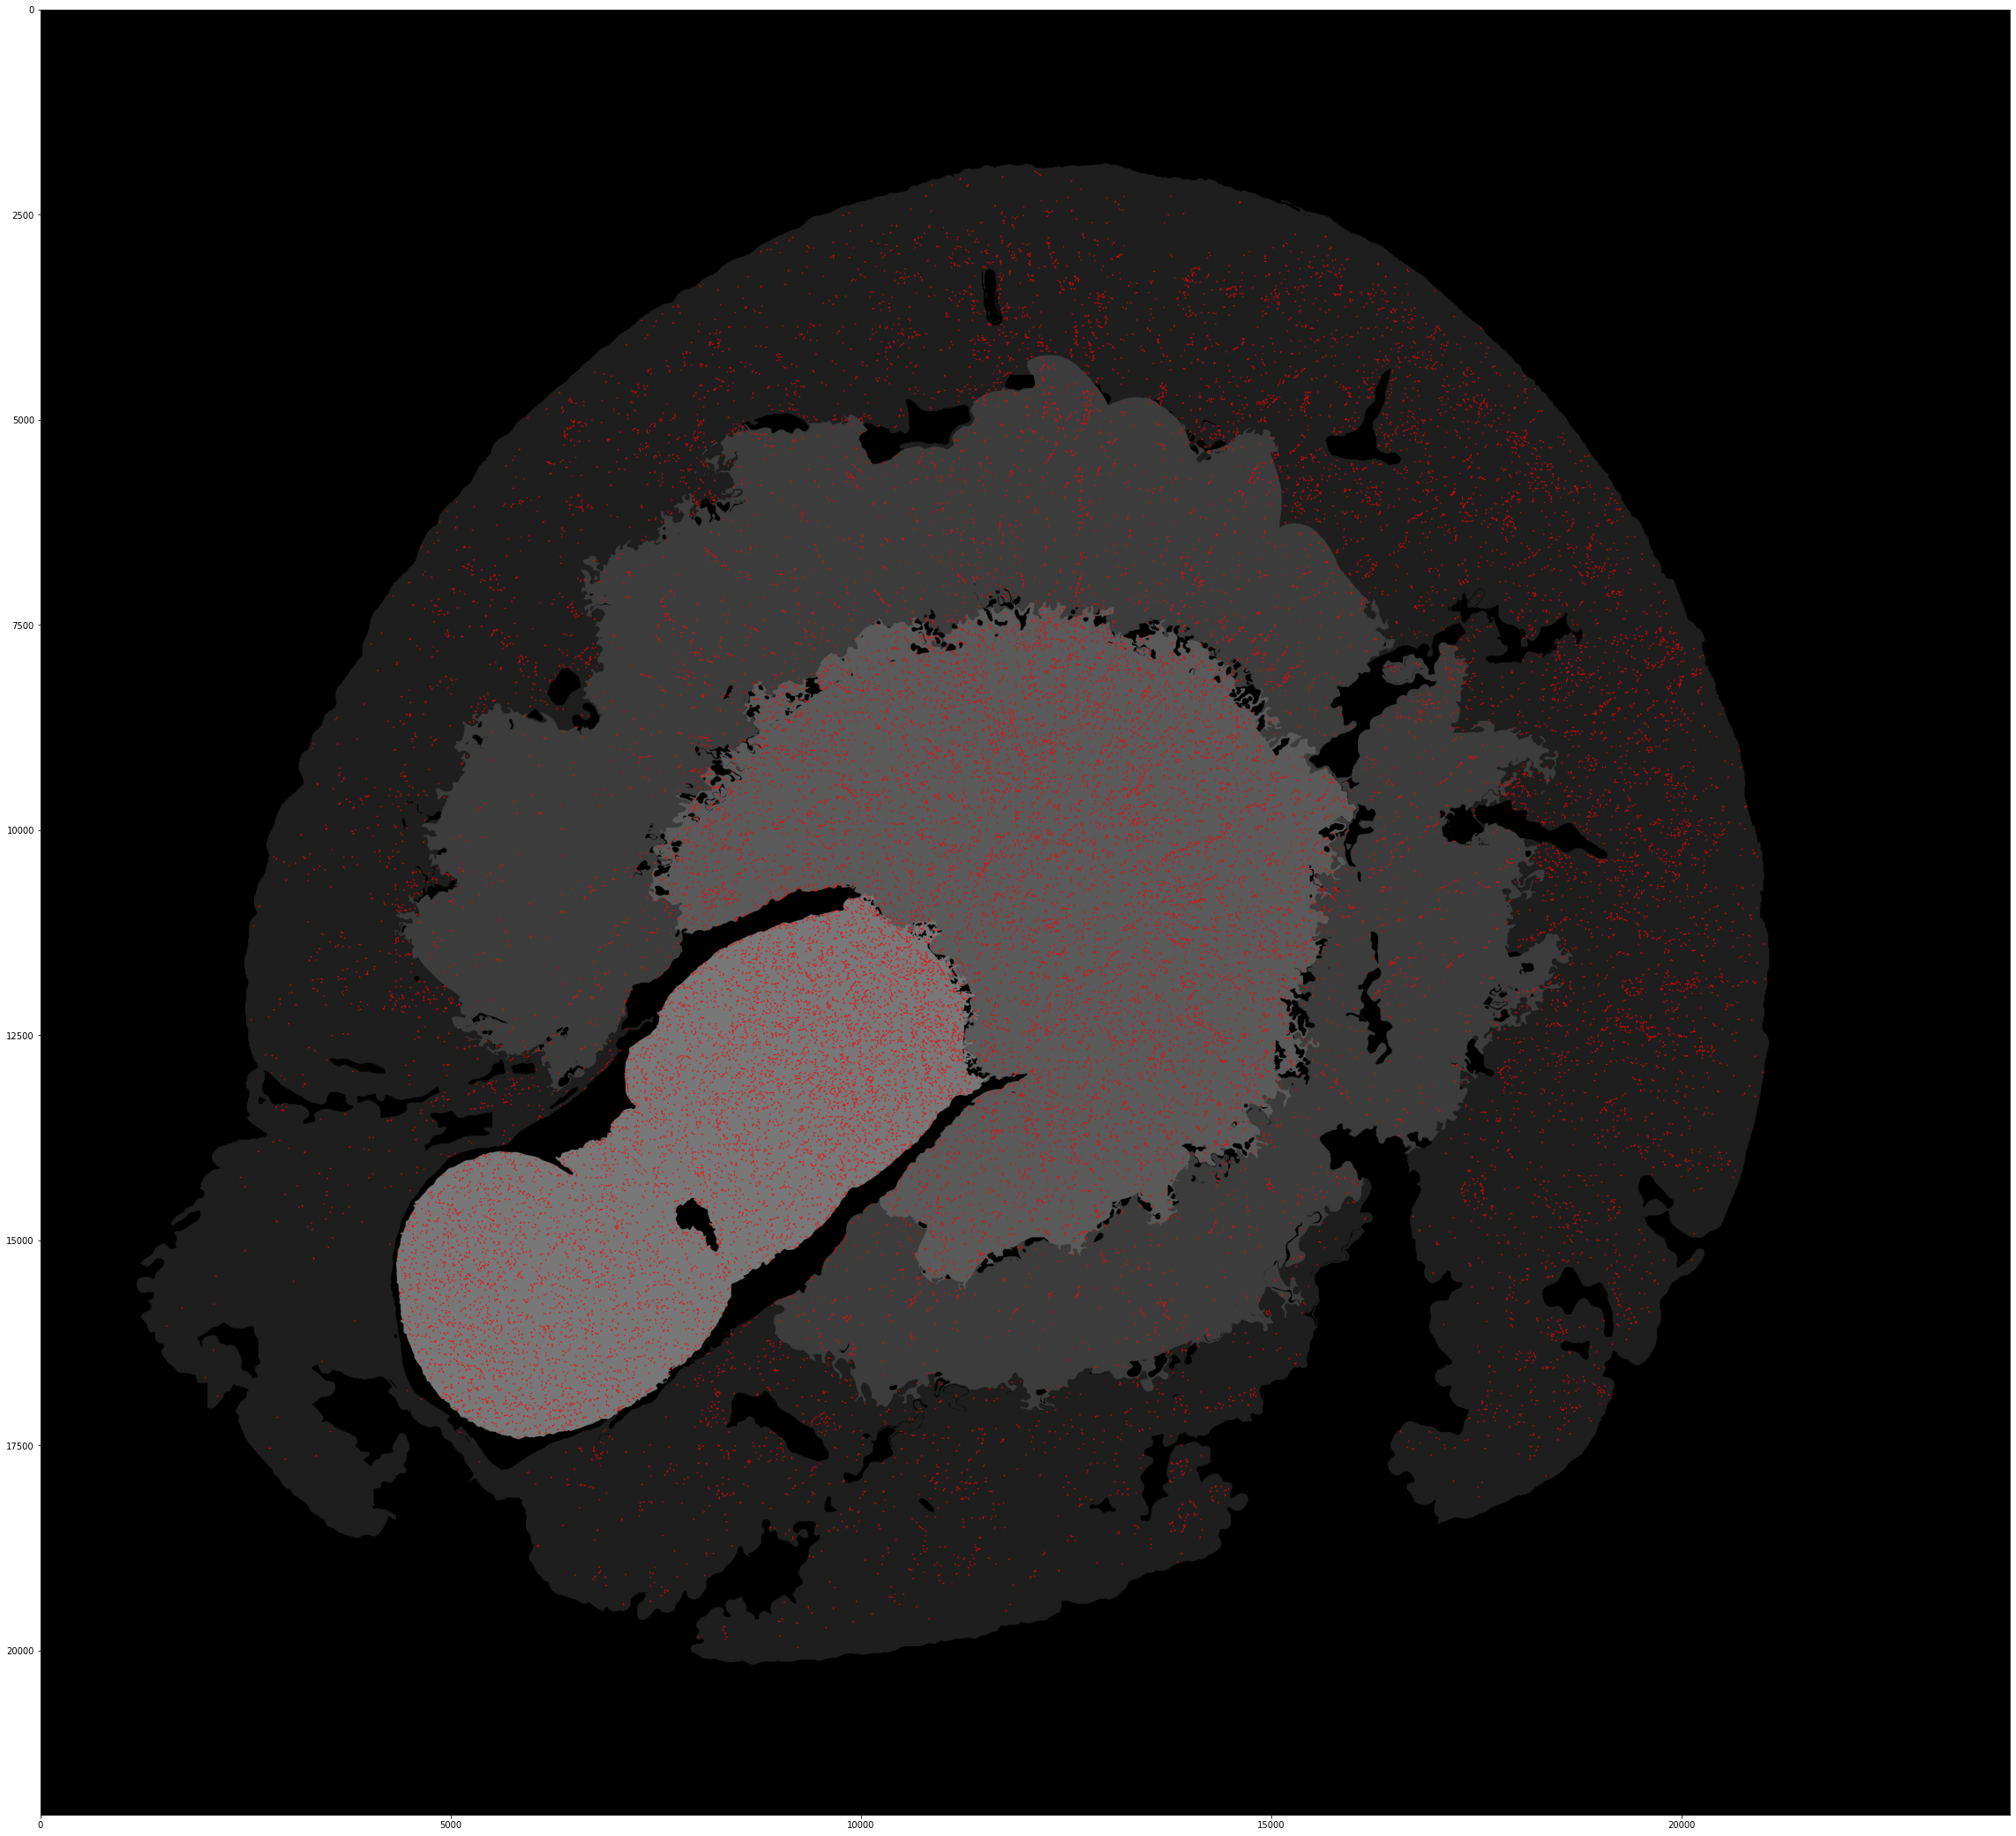

In [37]:
slide_df = df.query('slide == @slide and area > 200 ')
img = cv.drawContours(img2, slide_df['contour_info'].values, -1, (255,0,0), 3)
plt.figure(figsize=(40,40))
plt.imshow(img)

In [ ]:
slide_df = df.query('slide == @slide and area > 50')
img = cv.drawContours(img, slide_df['contour_info'].values, -1, (0,255,0), 3)
plt.figure(figsize=(40,40))
plt.imshow(img)